## Load the data

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer # type of feature_extraction
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE # to resample data
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
Cleaned_train = pd.read_csv('/content/cleaned_x_train.csv')
Cleaned_test = pd.read_csv('/content/cleaned_x_test.csv')
Cleaned_val = pd.read_csv('/content/cleaned_x_valid.csv')

In [ ]:
Cleaned_val.columns=['cleaned_x_train','y_train']
Cleaned_val

,cleaned_x_train,y_train
0,داك شي لي كان غدى يكون لولا تدخل بعض الصفحات و...,3
1,انا تحت امرك زيادبس هيكون يوم ايه,0
2,لا زعيمة ولا حاجة دانا وبقول للحيطة داريني بتس...,0
3,يا ابراهيم مريم منزلتش مصر قبل كده ولا مشت في ...,0
4,فهمتوا حاجه من كلامه؟,2
...,...,...
29539,بالبوازيك يا أستاذ محمد,0
29540,القط بتاعي مايحلاش النوم عنده الا و يجي ينام ع...,0
29541,كان لازم نحلف آبى ع المصحف ومش اى حلفان بقى ان...,0
29542,انت اعلم فعلاً منصور اعلم ان توار درنة مصبيين ...,2


In [ ]:
Cleaned_train = pd.concat([Cleaned_train, Cleaned_val], ignore_index=True)
Cleaned_train


,cleaned_x_train,y_train
0,اي خبر او تطور من جل الديب حدا يدقلي ما بفتحلو...,1
1,الشي الوحيد المنيح اللي عملو جورج وسوف بحياته ...,1
2,معلهش معلش معلهش معلهش معلهش معلهش معلهش معلهش...,0
3,اول ما خذا البطاقة جا في بالي اياب اليوفي يارب...,2
4,انا صرت نازلة شي خمس مرات من يوم ما نشهرت المل...,1
...,...,...
118169,بالبوازيك يا أستاذ محمد,0
118170,القط بتاعي مايحلاش النوم عنده الا و يجي ينام ع...,0
118171,كان لازم نحلف آبى ع المصحف ومش اى حلفان بقى ان...,0
118172,انت اعلم فعلاً منصور اعلم ان توار درنة مصبيين ...,2


In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Report method to see our model


# Model Evaluation Report
 A function to evaluate a machine learning model's performance.
 - The function computes training and testing accuracies
 - generates a classification report
 -  displays a confusion matrix using a heatmap.


In [ ]:
def report(model, X_train, y_train, X_test, y_test):
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f'Train acc: {train_acc}')
    print(f'Test acc: {test_acc}')

    predictions = model.predict(X_test)
    cr = classification_report(y_test, predictions)
    print(cr)

    cm = confusion_matrix(y_test, predictions)
    fig, ax = plt.subplots(figsize=(12, 12))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    plt.show()


### Text_fit_predict_without_imbalanced method to fit our model with orignal processed data

# Model Training and Evaluation without Handling Imbalanced Data

This function  train and evaluate a machine learning model on original data without addressing class imbalance.
- The function fits the model on the training data and evaluates its performance on both the training and testing datasets.


In [ ]:
# this method to fit our orignal data
def text_fit_predict_without_imbalanced(X_train, X_test, y_train, y_test, model_model):

  model = model_model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model


### Text_fit_predict_with_imbalanced method to fit model with resample processed data

# Model Training and Evaluation with Handling Imbalanced Data

A function to train and evaluate a machine learning model after applying resampling techniques.
-  The function fits the model on the resampled training data and evaluates its performance on both the training and testing datasets

In [ ]:
def text_fit_predict_with_imbalanced(X_train, X_test, y_train, y_test, model_model, re_sample):

  print('features: {}'.format(X_train.shape[1]))

  os =  re_sample  # type of resample (RandomOverSampler or SMOTE)
  X_res, y_res = os.fit_resample(X_train, y_train)
  print(f'resample: {X_res.shape, y_res.shape}')

  model=model_model.fit(X_res, y_res)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f'Train acc: {train_acc}')
  print(f'Test acc: {test_acc}')

  return model


In [ ]:
cntVec = CountVectorizer()
X_train_c = cntVec.fit_transform(Cleaned_train['cleaned_x_train'])  # fit X_train only
X_test_c = cntVec.transform(Cleaned_test['cleaned_x_test'])  # transform X_test
model1 = text_fit_predict_without_imbalanced(X_train_c, X_test_c, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'))

Train acc: 0.8832337356740194
Test acc: 0.814173974875563


### Using pipline

# Pipeline with CountVectorizer and LogisticRegression

- This code segment demonstrates the creation of a pipeline with `CountVectorizer` and `LogisticRegression` for text classification.

In [ ]:
# Step 1: Initialize CountVectorizer
cntVec = CountVectorizer()

# Step 2: Create a pipeline with CountVectorizer and LogisticRegression
pipeline = Pipeline([
    ('count_vectorizer', cntVec),
    ('logistic_regression', LogisticRegression(solver='sag'))
])

# Step 3: Fit the pipeline on the training data and predict on the testing data
pipeline.fit(Cleaned_train['cleaned_x_train'], Cleaned_train['y_train'])
predictions = pipeline.predict(Cleaned_test['cleaned_x_test'])

# Evaluate the model
train_acc = pipeline.score(Cleaned_train['cleaned_x_train'], Cleaned_train['y_train'])
test_acc = pipeline.score(Cleaned_test['cleaned_x_test'], Cleaned_test['y_test'])
print(f'Train acc: {train_acc}')
print(f'Test acc: {test_acc}')

Train acc: 0.8832252712837094
Test acc: 0.8141062540209257


Train acc: 0.8831152342096799
Test acc: 0.8138015101750584
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     11468
           1       0.84      0.81      0.83      5636
           2       0.76      0.82      0.79      7266
           3       0.88      0.61      0.72      2330
           4       0.84      0.57      0.68      2833

    accuracy                           0.81     29533
   macro avg       0.83      0.75      0.78     29533
weighted avg       0.82      0.81      0.81     29533



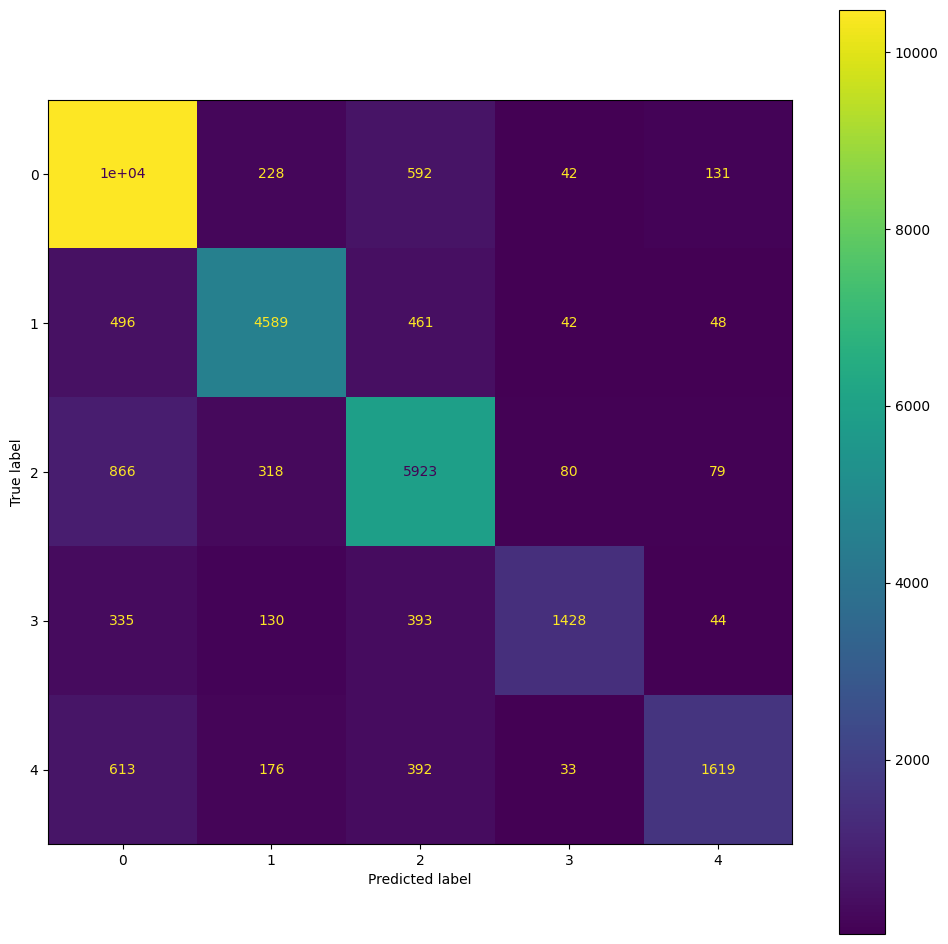

In [ ]:
report(model1, X_train_c, Cleaned_train['y_train'], X_test_c,Cleaned_test['y_test'])

# Label Mapping

Manually created label mapping for the classes:

| Class Index | Class Label |
|-------------|-------------|
| 0           | EG          |
| 1           | LB          |
| 2           | LY          |
| 3           | MA          |
| 4           | SD          |


In [ ]:
# Manually create the label mapping
class_labels = ['EG', 'LB', 'LY', 'MA', 'SD']
label_mapping = {index: label for index, label in enumerate(class_labels)}
inverse_label_mapping = {label: index for index, label in label_mapping.items()}
print(f'Label mapping: {label_mapping}')

Label mapping: {0: 'EG', 1: 'LB', 2: 'LY', 3: 'MA', 4: 'SD'}


# Test Prediction

In [ ]:
# Test with a new string
test_string = ["الفانله البضيا بخطين حمر "]
test_string_c = cntVec.transform(test_string)
test_prediction = model1.predict(test_string_c)
test_prediction_label = [label_mapping[pred] for pred in test_prediction]
print(f'Test prediction for the new string (encoded): {test_prediction}')
print(f'Test prediction for the new string (original label): {test_prediction_label}')

Test prediction for the new string (encoded): [0]
Test prediction for the new string (original label): ['EG']


#### with resample data with RandomOverSampler

# Model Training and Prediction

- Using Logistic Regression with the 'sag' solver and Random OverSampler for handling imbalanced classes.

In [ ]:
model2 = text_fit_predict_with_imbalanced(X_train_c, X_test_c, Cleaned_train['y_train'], Cleaned_test['y_test'], LogisticRegression(solver='sag'), RandomOverSampler())

features: 212835
resample: ((230780, 212835), (230780,))
Train acc: 0.9091178412418953
Test acc: 0.8076727728303931


# Model Evaluation Report

Train acc: 0.9091178412418953
Test acc: 0.8076727728303931
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     11468
           1       0.82      0.85      0.83      5636
           2       0.79      0.80      0.79      7266
           3       0.69      0.73      0.71      2330
           4       0.64      0.71      0.67      2833

    accuracy                           0.81     29533
   macro avg       0.77      0.79      0.77     29533
weighted avg       0.81      0.81      0.81     29533



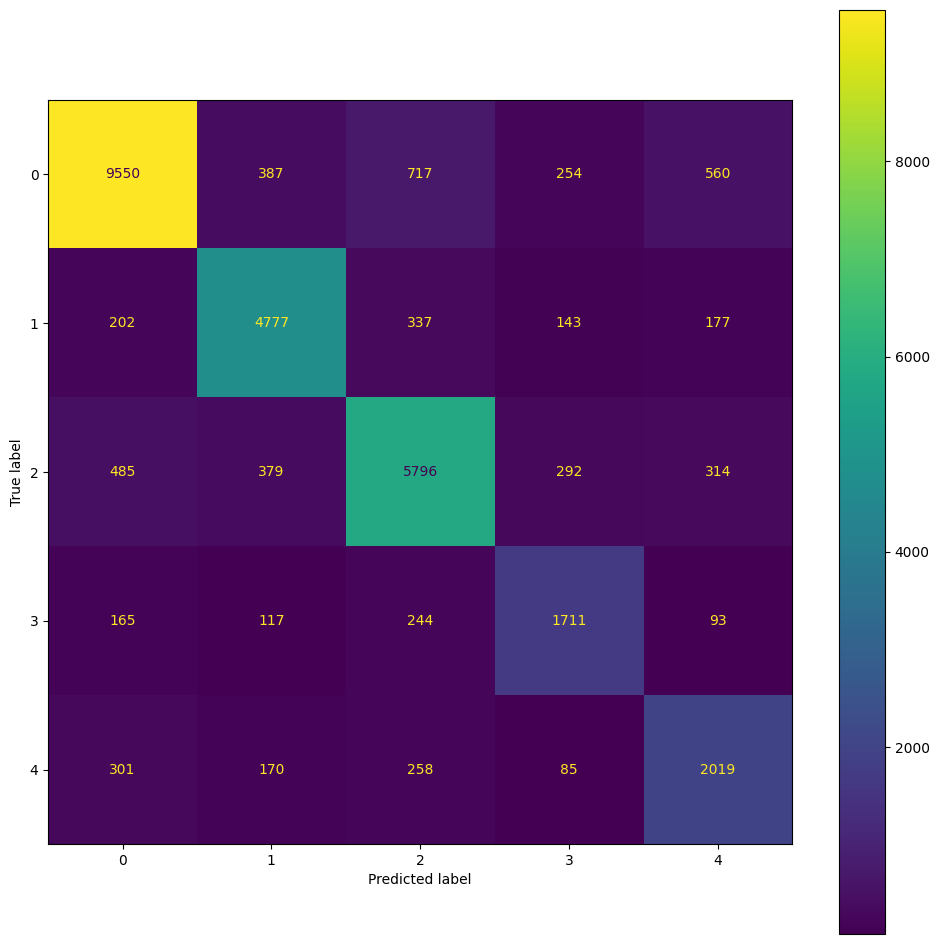

In [ ]:
report(model2, X_train_c, Cleaned_train['y_train'], X_test_c,Cleaned_test['y_test'])

# Grid Search for Hyperparameter Tuning

- Performing hyperparameter tuning using Grid Search with cross-validation.


In [ ]:
grid={'C':10.0 **np.arange(-2,3),'max_iter':[500]}

os =  RandomOverSampler()
X_res, y_res = os.fit_resample(X_train_tfidf, Cleaned_train['y_train'])  # fit resample data

log_model = LogisticRegression(solver='sag')
clf=GridSearchCV(estimator = log_model, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
clf.fit(X_res, y_res )

GridSearchCV(cv=5, estimator=LogisticRegression(solver='sag'), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'max_iter': [500]},
             scoring='f1_macro')

# Model Evaluation Report

Train acc: 0.991853838414008
Test acc: 0.7922093367893637
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     11468
           1       0.85      0.85      0.85      5636
           2       0.81      0.81      0.81      7266
           3       0.76      0.72      0.74      2330
           4       0.70      0.69      0.69      2833

    accuracy                           0.83     29533
   macro avg       0.80      0.79      0.79     29533
weighted avg       0.83      0.83      0.83     29533



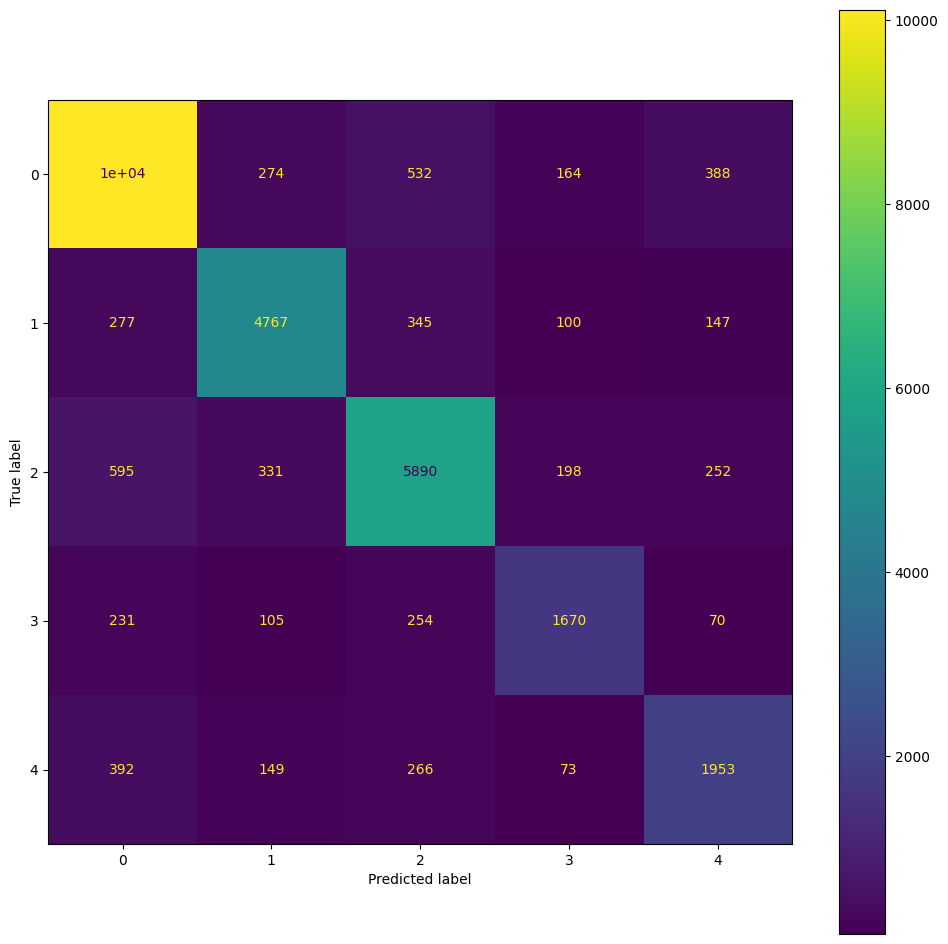

In [ ]:
report(clf, X_train_tfidf, Cleaned_train['y_train'], X_test_tfidf,Cleaned_test['y_test'])

------------

# Deep learning models

In [ ]:
x_train_padded = pd.read_csv('/content/x_train_padded.csv')
x_test_padded = pd.read_csv('/content/x_test_padded.csv')
x_valid_padded = pd.read_csv('/content/x_valid_padded.csv')

In [ ]:
x_train_padded

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,y_train
0,53.0,598.0,40.0,4565.0,1.0,9495.0,7404.0,111.0,43667.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,564.0,644.0,26071.0,6.0,1895.0,3113.0,12139.0,8884.0,1058.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5775.0,413.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,101.0,5775.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,99.0,3.0,10234.0,8318.0,1390.0,2.0,804.0,68139.0,1592.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,10.0,1694.0,5513.0,29.0,2140.0,456.0,1.0,63.0,3.0,68140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88625,1.0,814.0,5546.0,6.0,187673.0,34096.0,187674.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
88626,1325.0,36990.0,16060.0,41664.0,32033.0,7.0,3412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
88627,132.0,519.0,66358.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
88628,108.0,131.0,566.0,34933.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


# Renaming Columns

- Renaming the columns of the DataFrame `x_valid_padded`.

In [ ]:
x_valid_padded.columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'y_train']

In [ ]:
padded_train = pd.concat([x_train_padded, x_valid_padded], ignore_index=True)
padded_train

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,y_train
0,53.0,598.0,40.0,4565.0,1.0,9495.0,7404.0,111.0,43667.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,564.0,644.0,26071.0,6.0,1895.0,3113.0,12139.0,8884.0,1058.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5775.0,413.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,101.0,5775.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,99.0,3.0,10234.0,8318.0,1390.0,2.0,804.0,68139.0,1592.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,10.0,1694.0,5513.0,29.0,2140.0,456.0,1.0,63.0,3.0,68140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118169,7.0,3287.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118170,18803.0,3340.0,723.0,166.0,86.0,4.0,291.0,3678.0,15.0,14230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118171,18.0,65.0,42923.0,36.0,12117.0,138.0,377.0,14367.0,87.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
118172,21.0,1814.0,1002.0,1971.0,1814.0,26.0,48199.0,2274.0,18.0,130672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
Unique_Words=187345
input_length=50
EMBEDDING_DIM=100

##  LSTM Model

- Define a Keras model using Sequential API and compile it with custom metrics.

In [ ]:
# Define your Keras model
model = Sequential()
model.add(Embedding(Unique_Words, EMBEDDING_DIM, input_length=input_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

# Compile your Keras model with custom metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           18734500  
                                                                 
 spatial_dropout1d_4 (Spati  (None, 50, 100)           0         
 alDropout1D)                                                    
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 5)                 505       
                                                                 
Total params: 18815405 (71.78 MB)
Trainable params: 18815405 (71.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
X_train=padded_train.drop('y_train',axis=1)
y_train=padded_train['y_train']

In [ ]:
y_train

0         1
1         1
2         0
3         2
4         1
         ..
118169    0
118170    0
118171    0
118172    2
118173    0
Name: y_train, Length: 118174, dtype: int64

In [ ]:
X_test=x_test_padded.drop('y_test',axis=1)
y_test=x_test_padded['y_test']

Training Keras Model

- Training the Keras model with specified epochs and batch size.

In [ ]:
epochs = 4
batch_size = 64
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=1, min_delta=0.0001)])

Epoch 1/4
3693/3693 [==============================] - 657s 177ms/step - loss: 1.4311 - accuracy: 0.4086 - val_loss: 1.4562 - val_accuracy: 0.3882
Epoch 2/4
3693/3693 [==============================] - 646s 175ms/step - loss: 1.2877 - accuracy: 0.4760 - val_loss: 0.8876 - val_accuracy: 0.6833
Epoch 3/4
3693/3693 [==============================] - 637s 173ms/step - loss: 0.5653 - accuracy: 0.8056 - val_loss: 0.4911 - val_accuracy: 0.8316
Epoch 4/4
3693/3693 [==============================] - 627s 170ms/step - loss: 0.2670 - accuracy: 0.9142 - val_loss: 0.4828 - val_accuracy: 0.8403


Evaluate Keras Model

- Evaluate the trained Keras model on the test set.
- And This is the best Model until now

In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

924/924 [==============================] - 16s 17ms/step - loss: 0.4828 - accuracy: 0.8403
Test set
  Loss: 0.483
  Accuracy: 0.840


Generate Classification Report

- Generate the classification report

In [ ]:
# Assuming y_pred is your model's predictions on X_test
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

924/924 [==============================] - 15s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89     11470
           1       0.89      0.83      0.86      5636
           2       0.80      0.83      0.82      7269
           3       0.87      0.68      0.76      2330
           4       0.80      0.65      0.72      2839

    accuracy                           0.84     29544
   macro avg       0.84      0.78      0.81     29544
weighted avg       0.84      0.84      0.84     29544



In [ ]:
y_test.shape,y_pred.shape

((29544,), (29544, 5))

Plot Training and Validation Metrics

- Visualize the training and validation accuracy and loss values over epochs.

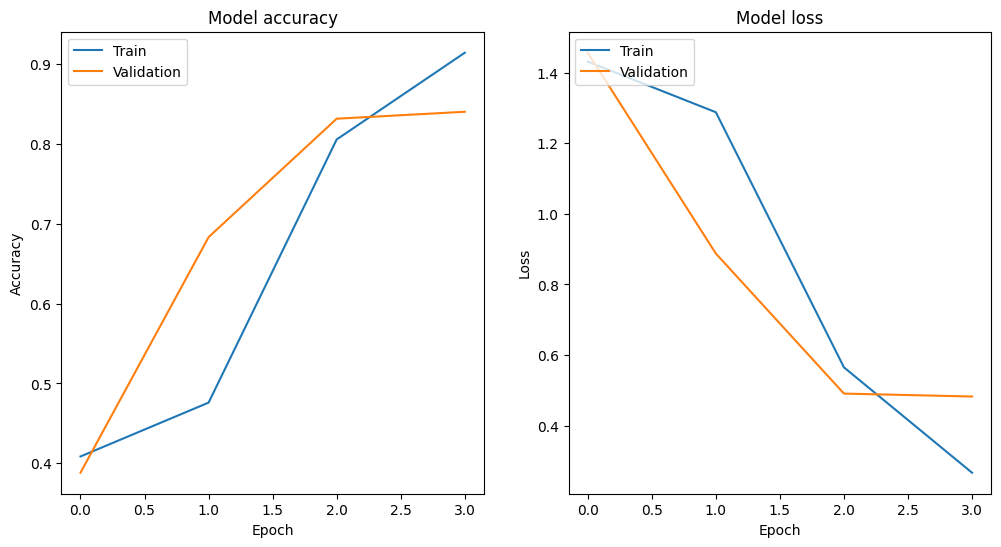

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Display the plots
plt.show()

# Save models using pickle

# Save Best Model

Save the best model (`model4`) using pickle.

In [ ]:
# best model is model4
import pickle
filename = 'DL_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'TfidfVectorizer.pkl'
pickle.dump(model4, open(filename, 'wb'))

In [ ]:
filename = 'CountVectorizer.pkl'
pickle.dump(model1, open(filename, 'wb'))